In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
from math import pi
import warnings
warnings.filterwarnings('ignore')

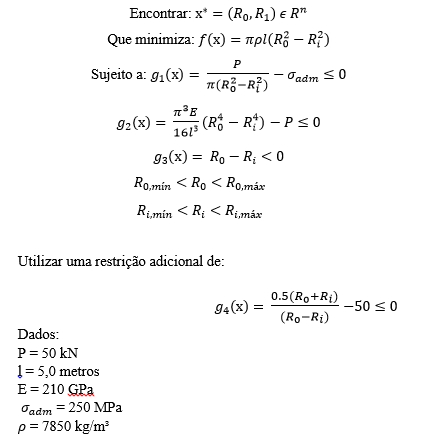

In [2]:
P = 50      # kN
l = 500     # cm
E = 2.1e4   # kN/cm²
sigma = 25  # kN/cm²
r = 7.85e-3 # kg/cm³

# Função objetivo:
obj = lambda x: (pi * r * l * (x[0]**2 - x[1]**2))

# Restrições:
cons = [#{'type': 'eq', 'fun': lambda x: x[0] - x[1] - x[2]},
        {'type': 'ineq', 'fun': lambda x: -(P/(pi * (x[0]**2 - x[1]**2)) - sigma)},
        {'type': 'ineq', 'fun': lambda x: -((pi**3 * E * (x[0]**4 - x[1]**4))/(16 * l**3) - P)},
        {'type': 'ineq', 'fun': lambda x: (x[0] - x[1] - 0.15743)},
        {'type': 'ineq', 'fun': lambda x: ((0.5 * (x[0] + x[1]))/(x[0] - x[1]) - 50)}
        ]

# Restrições de caixa:
bound = [(0, 10), (0, 10)]#, (0, 1)]

# Ponto de partida:
xi = [9.5, 8]#, 0.16]

# Para obter os pontos x[0] e x[1] a cada iteração:
x1h = []
x2h = []
def callbackF(Xi):
    x1h.append(Xi[0])
    x2h.append(Xi[1])

best = minimize(
                obj,
                [xi],
                method='SLSQP',#'COBYLA',
                constraints=cons,
                bounds=bound,
                tol=1e-3,
                options={'disp':True},
                callback=callbackF
    )

# Exibe o resultado:
if best.success:
    print(f'Ótimo encontrado: R0 = {round(best.x[0], 6)}, Ri = {round(best.x[1], 6)}')#, t = {round(best.x[2], 6)}')
    print(f'Ponto inicial: {xi}')
else:
    print('Problema sem solução!')

# Adiciona os pontos iniciais ao histórico de convergência:
x1h = [xi[0]] + x1h
x2h = [xi[1]] + x2h

Optimization terminated successfully    (Exit mode 0)
            Current function value: 30.560789538026576
            Iterations: 5
            Function evaluations: 13
            Gradient evaluations: 4
Ótimo encontrado: R0 = 7.950215, Ri = 7.792785
Ponto inicial: [9.5, 8]


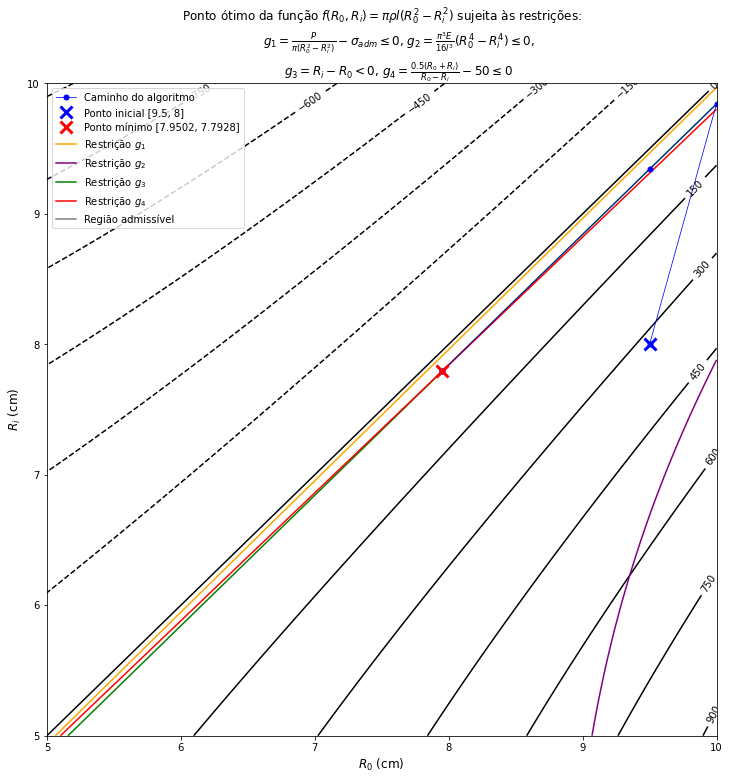

In [3]:
#### Plot:
plt.rc('figure', figsize=(12, 12))

valores = 1000
x = np.linspace(5, 10, valores)
y = np.linspace(5, 10, valores)
x1, x2 = np.meshgrid(x, y)

f = pi * r * l * (x1**2 - x2**2)
g1 = -(P/(pi * (x1**2 - x2**2)) - sigma)
g2 = -((pi**3 * E * (x1**4 - x2**4))/(16 * l**3) - P)
g3 = (x1 - x2 - 0.15743)
g4 = ((0.5 * (x1 + x2))/(x1 - x2) - 50)

fig, ax = plt.subplots()
title = (r'''Ponto ótimo da função $f(R_0, R_i) = \pi \rho l (R_0^2 - R_i^2)$ sujeita às restrições:
         $g_1 = \frac{P}{\pi (R_0^2 - R_i^2)} - \sigma_{adm} \leq 0$, $g_2 = \frac{\pi^3 E}{16 l^3}(R_0^4 - R_i^4) \leq 0$,
         $g_3 = R_i - R_0 < 0$, $g_4 = \frac{0.5(R_0 + R_i)}{R_0 - R_i} - 50 \leq 0$''')
CS = ax.contour(x, y, f, 15, colors='k')
ax.clabel(CS, inline=0.5, fontsize=10)
ax.set_title(title)

string = f'Ponto mínimo [{round(best.x[0], 4)}, {round(best.x[1], 4)}]'
    
plt.plot(x1h, x2h, marker='.', lw=0.75, ms=10, label='Caminho do algoritmo', c='blue')
plt.plot(xi[0], xi[1], marker='x', ls='', ms=12, label=f'Ponto inicial {xi}', c='blue', mew=3)
plt.plot(best.x[0], best.x[1], marker='x', ls='', ms=12, label=string, c='r', mew=3)
plt.plot(x[0], y[0], label=r'Restrição $g_1$', c='orange')
plt.plot(x[0], y[0], label=r'Restrição $g_2$', c='purple')
plt.plot(x[0], y[0], label=r'Restrição $g_3$', c='g')
plt.plot(x[0], y[0], label=r'Restrição $g_4$', c='r')
plt.plot(x[0], y[0], label='Região admissível', c='gray')
plt.contour(x, y, g1, 0, colors='orange')
plt.contour(x, y, g2, 0, colors='purple')
plt.contour(x, y, g3, 0, colors='g')
plt.contour(x, y, g4, 0, colors='r')
plt.xlabel(r'$R_0$ (cm)', fontsize=12)#, fontweight='bold')
plt.ylabel(r'$R_i$ (cm)', fontsize=12)#, fontweight='bold')

plt.legend(loc='upper left')

plt.show()